In [52]:
from acquire import get_zillow_data
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [2]:
zillow = get_zillow_data()
zillow.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,0.0,0.0,NaN,27516.0,NaN,NaN,6037.0
1,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
2,0.0,0.0,NaN,10.0,NaN,NaN,6037.0
3,0.0,0.0,NaN,2108.0,NaN,174.21,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.39,6037.0


In [3]:
zillow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   bedroomcnt                    10000 non-null  float64
 1   bathroomcnt                   10000 non-null  float64
 2   calculatedfinishedsquarefeet  9968 non-null   float64
 3   taxvaluedollarcnt             10000 non-null  float64
 4   yearbuilt                     9966 non-null   float64
 5   taxamount                     9976 non-null   float64
 6   fips                          10000 non-null  float64
dtypes: float64(7)
memory usage: 547.0 KB


In [98]:
df = zillow.copy()

In [99]:
med_yearbuilt = np.nanmedian(zillow.yearbuilt)
med_taxamount = np.nanmedian(zillow.taxamount)
med_squarefeet = np.nanmedian(zillow.calculatedfinishedsquarefeet)
med_bedroomcnt = np.median(zillow.bedroomcnt)
med_bathroomcnt = np.median(zillow.bathroomcnt)

In [100]:
df['yearbuilt'].fillna(med_yearbuilt, inplace=True)
df['taxamount'].fillna(med_taxamount, inplace=True)
df['calculatedfinishedsquarefeet'].fillna(med_squarefeet, inplace=True)
df['bedroomcnt'].replace(0, median_bedroomcnt, inplace=True)
df['bathroomcnt'].replace(0, median_bathroomcnt, inplace=True)

In [101]:
df.head()

,bedroomcnt,bathroomcnt,calculatedfinishedsquarefeet,taxvaluedollarcnt,yearbuilt,taxamount,fips
0,3.0,2.0,1587.0,27516.0,1956.0,3920.105,6037.0
1,3.0,2.0,1587.0,10.0,1956.0,3920.105,6037.0
2,3.0,2.0,1587.0,10.0,1956.0,3920.105,6037.0
3,3.0,2.0,1587.0,2108.0,1956.0,174.210,6037.0
4,4.0,2.0,3633.0,296425.0,2005.0,6941.390,6037.0


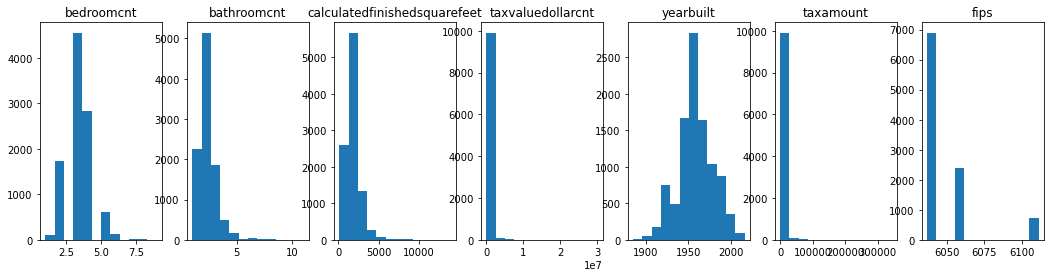

In [102]:
cols = df.columns
plt.figure(figsize=(18,4))
    
for i, col in enumerate(cols):
    
    # i starts at 0, but plot nos should start at 1
    plot_number = i + 1 

    # Create subplot.
    plt.subplot(1, len(cols), plot_number)
    plt.title(col)

    # Display histogram for column.
    df[col].hist(bins=12)
    
    plt.grid(False)

In [103]:
# drop row if at least one column has a zscore over 3
df = df[(np.abs(stats.zscore(df)) < 3).all(axis=1)]
#df = df[(np.abs(stats.zscore(df.taxvaluedollarcnt)) < 3)]

In [104]:
df = df.astype('int')

In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9036 entries, 0 to 9999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype
---  ------                        --------------  -----
 0   bedroomcnt                    9036 non-null   int64
 1   bathroomcnt                   9036 non-null   int64
 2   calculatedfinishedsquarefeet  9036 non-null   int64
 3   taxvaluedollarcnt             9036 non-null   int64
 4   yearbuilt                     9036 non-null   int64
 5   taxamount                     9036 non-null   int64
 6   fips                          9036 non-null   int64
dtypes: int64(7)
memory usage: 564.8 KB
